# Dynamic Inoperability Input-Output Model

In [1]:
import diimpy.diim
import diimpy.analyze
import diimpy.plot

## Setup DIIM calculation
This is an example of how input configurations can be generated:

In [2]:
def generate_config(
    datafile,
    mode="demand",
    matrix_type="input-output",
    amat_sheet_name="IO_table",
    time_steps=0,
    pinfra=[],
    cvalue=[],
    ptime=[],
):
    config = {
        "DIIM": {
            "matrix_type": matrix_type,
            "mode": mode,
            "datafile": datafile,
            "amat_sheet_name": amat_sheet_name,
            "time_steps": time_steps,
        },
        "Perturbation": {
            "pinfra": pinfra,
            "ptime": ptime,
            "cvalue": cvalue 
        }
    }
    return config

## Run DIIM calculation

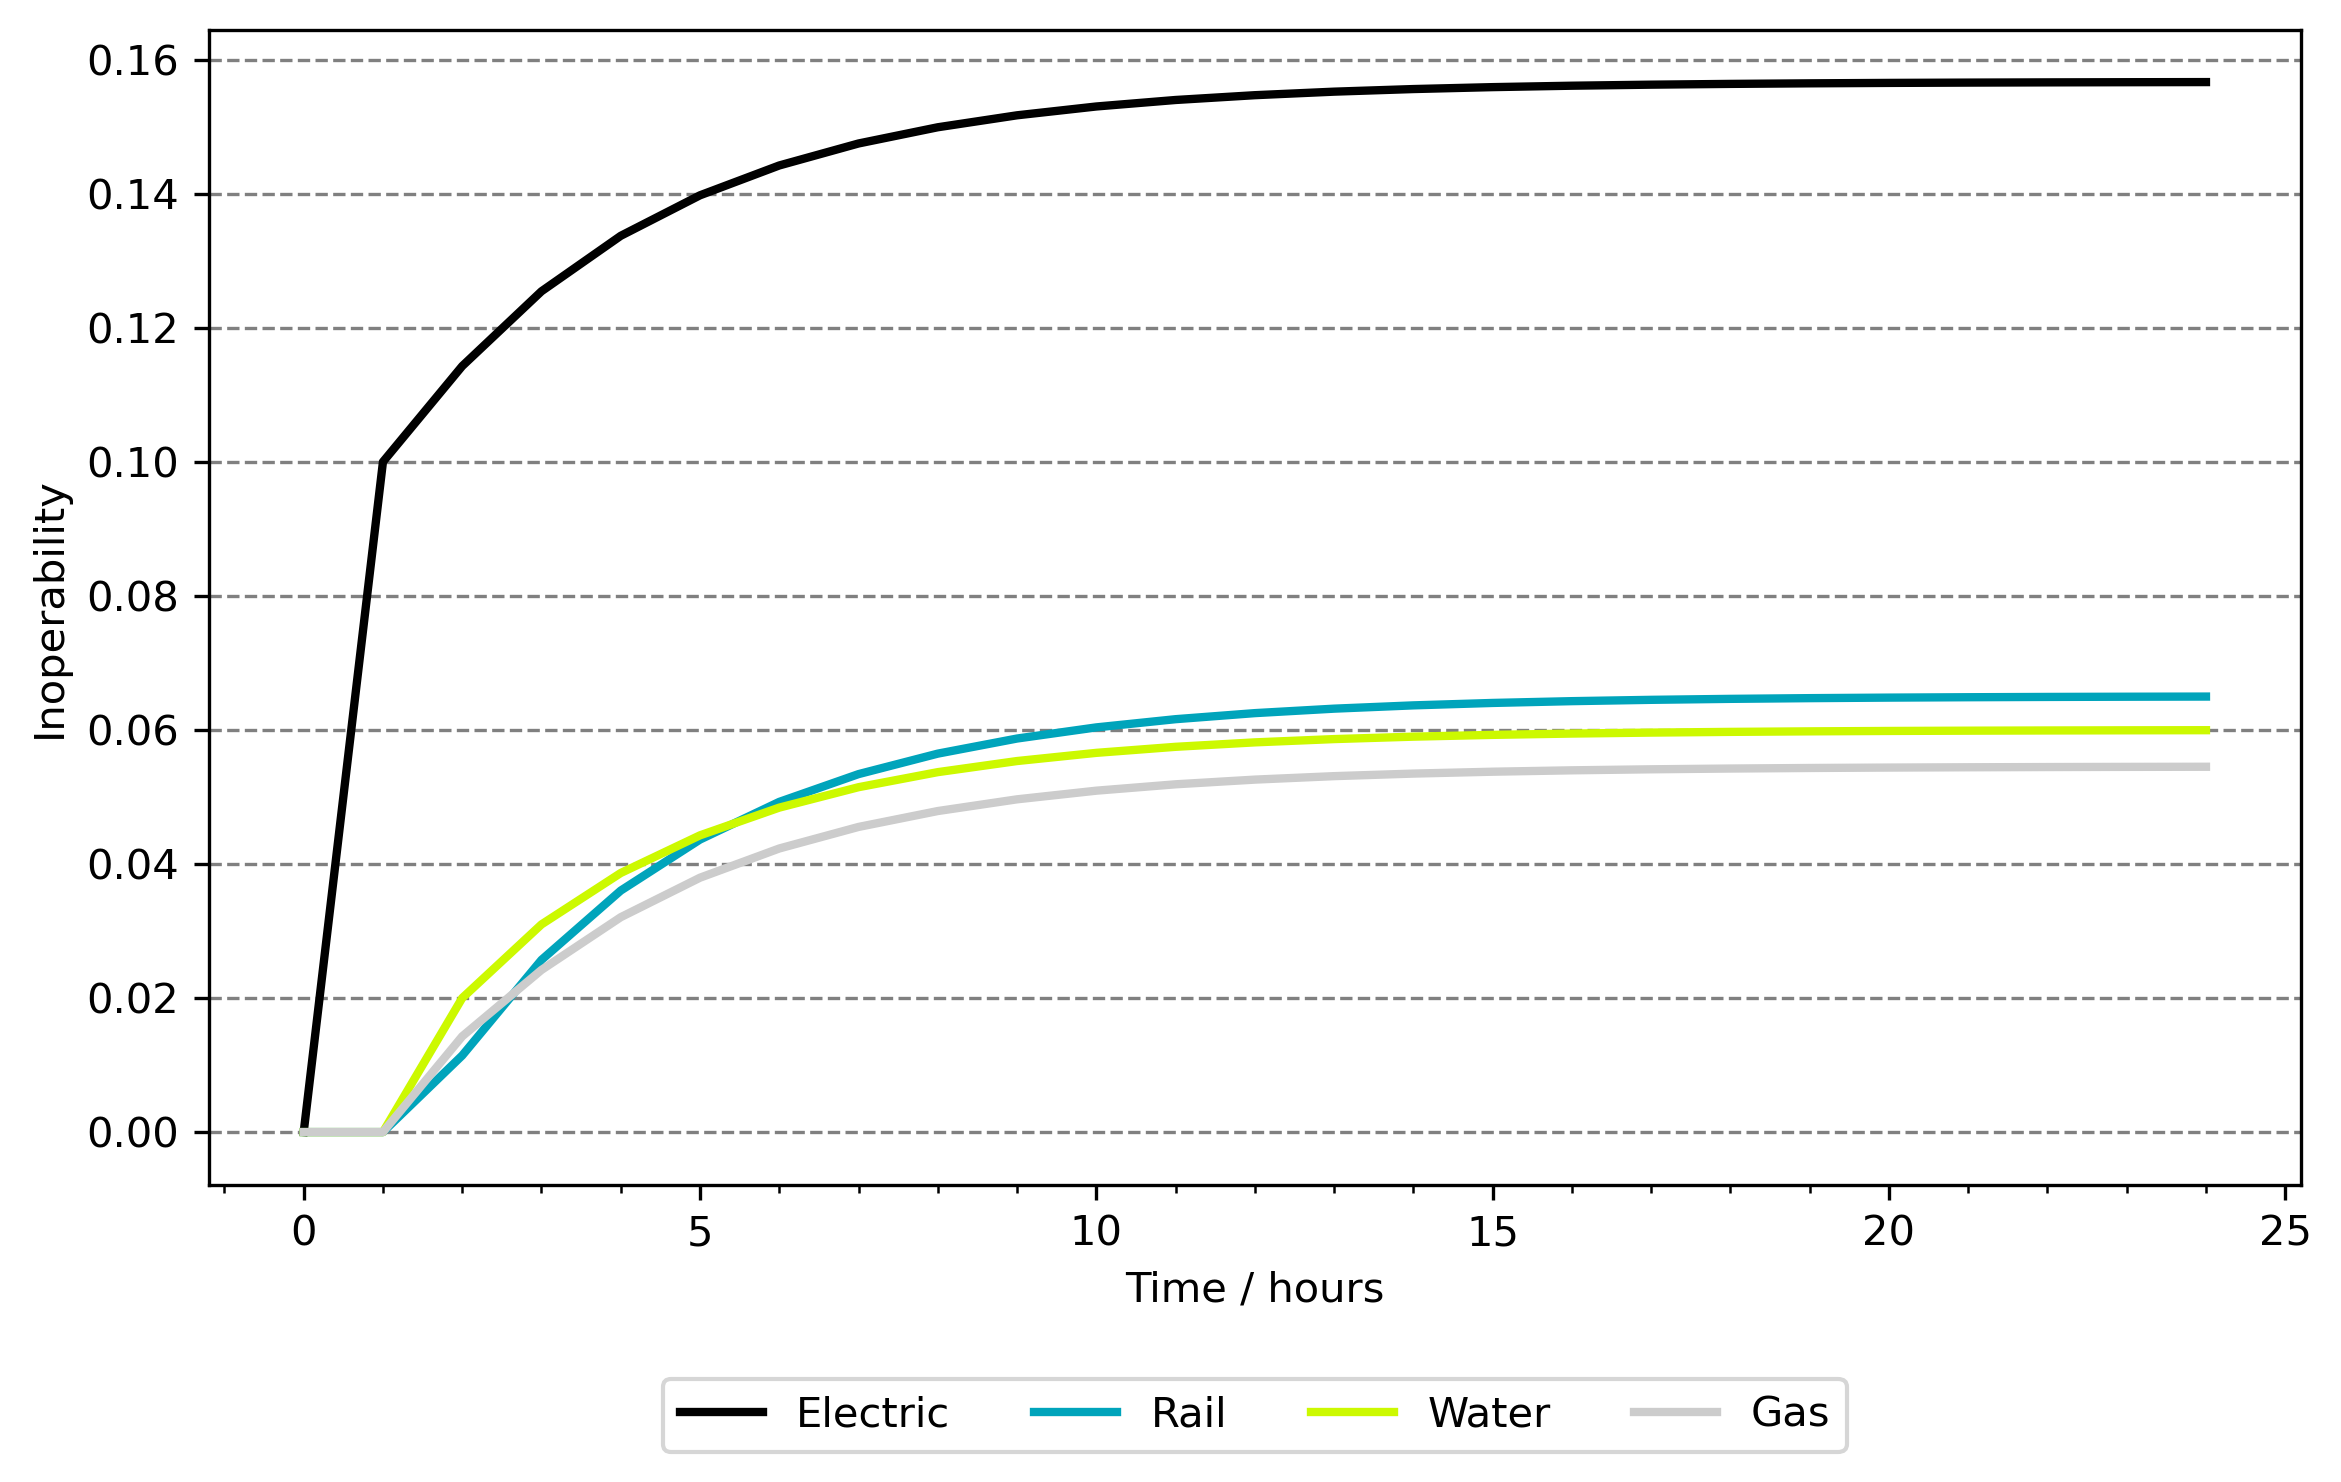

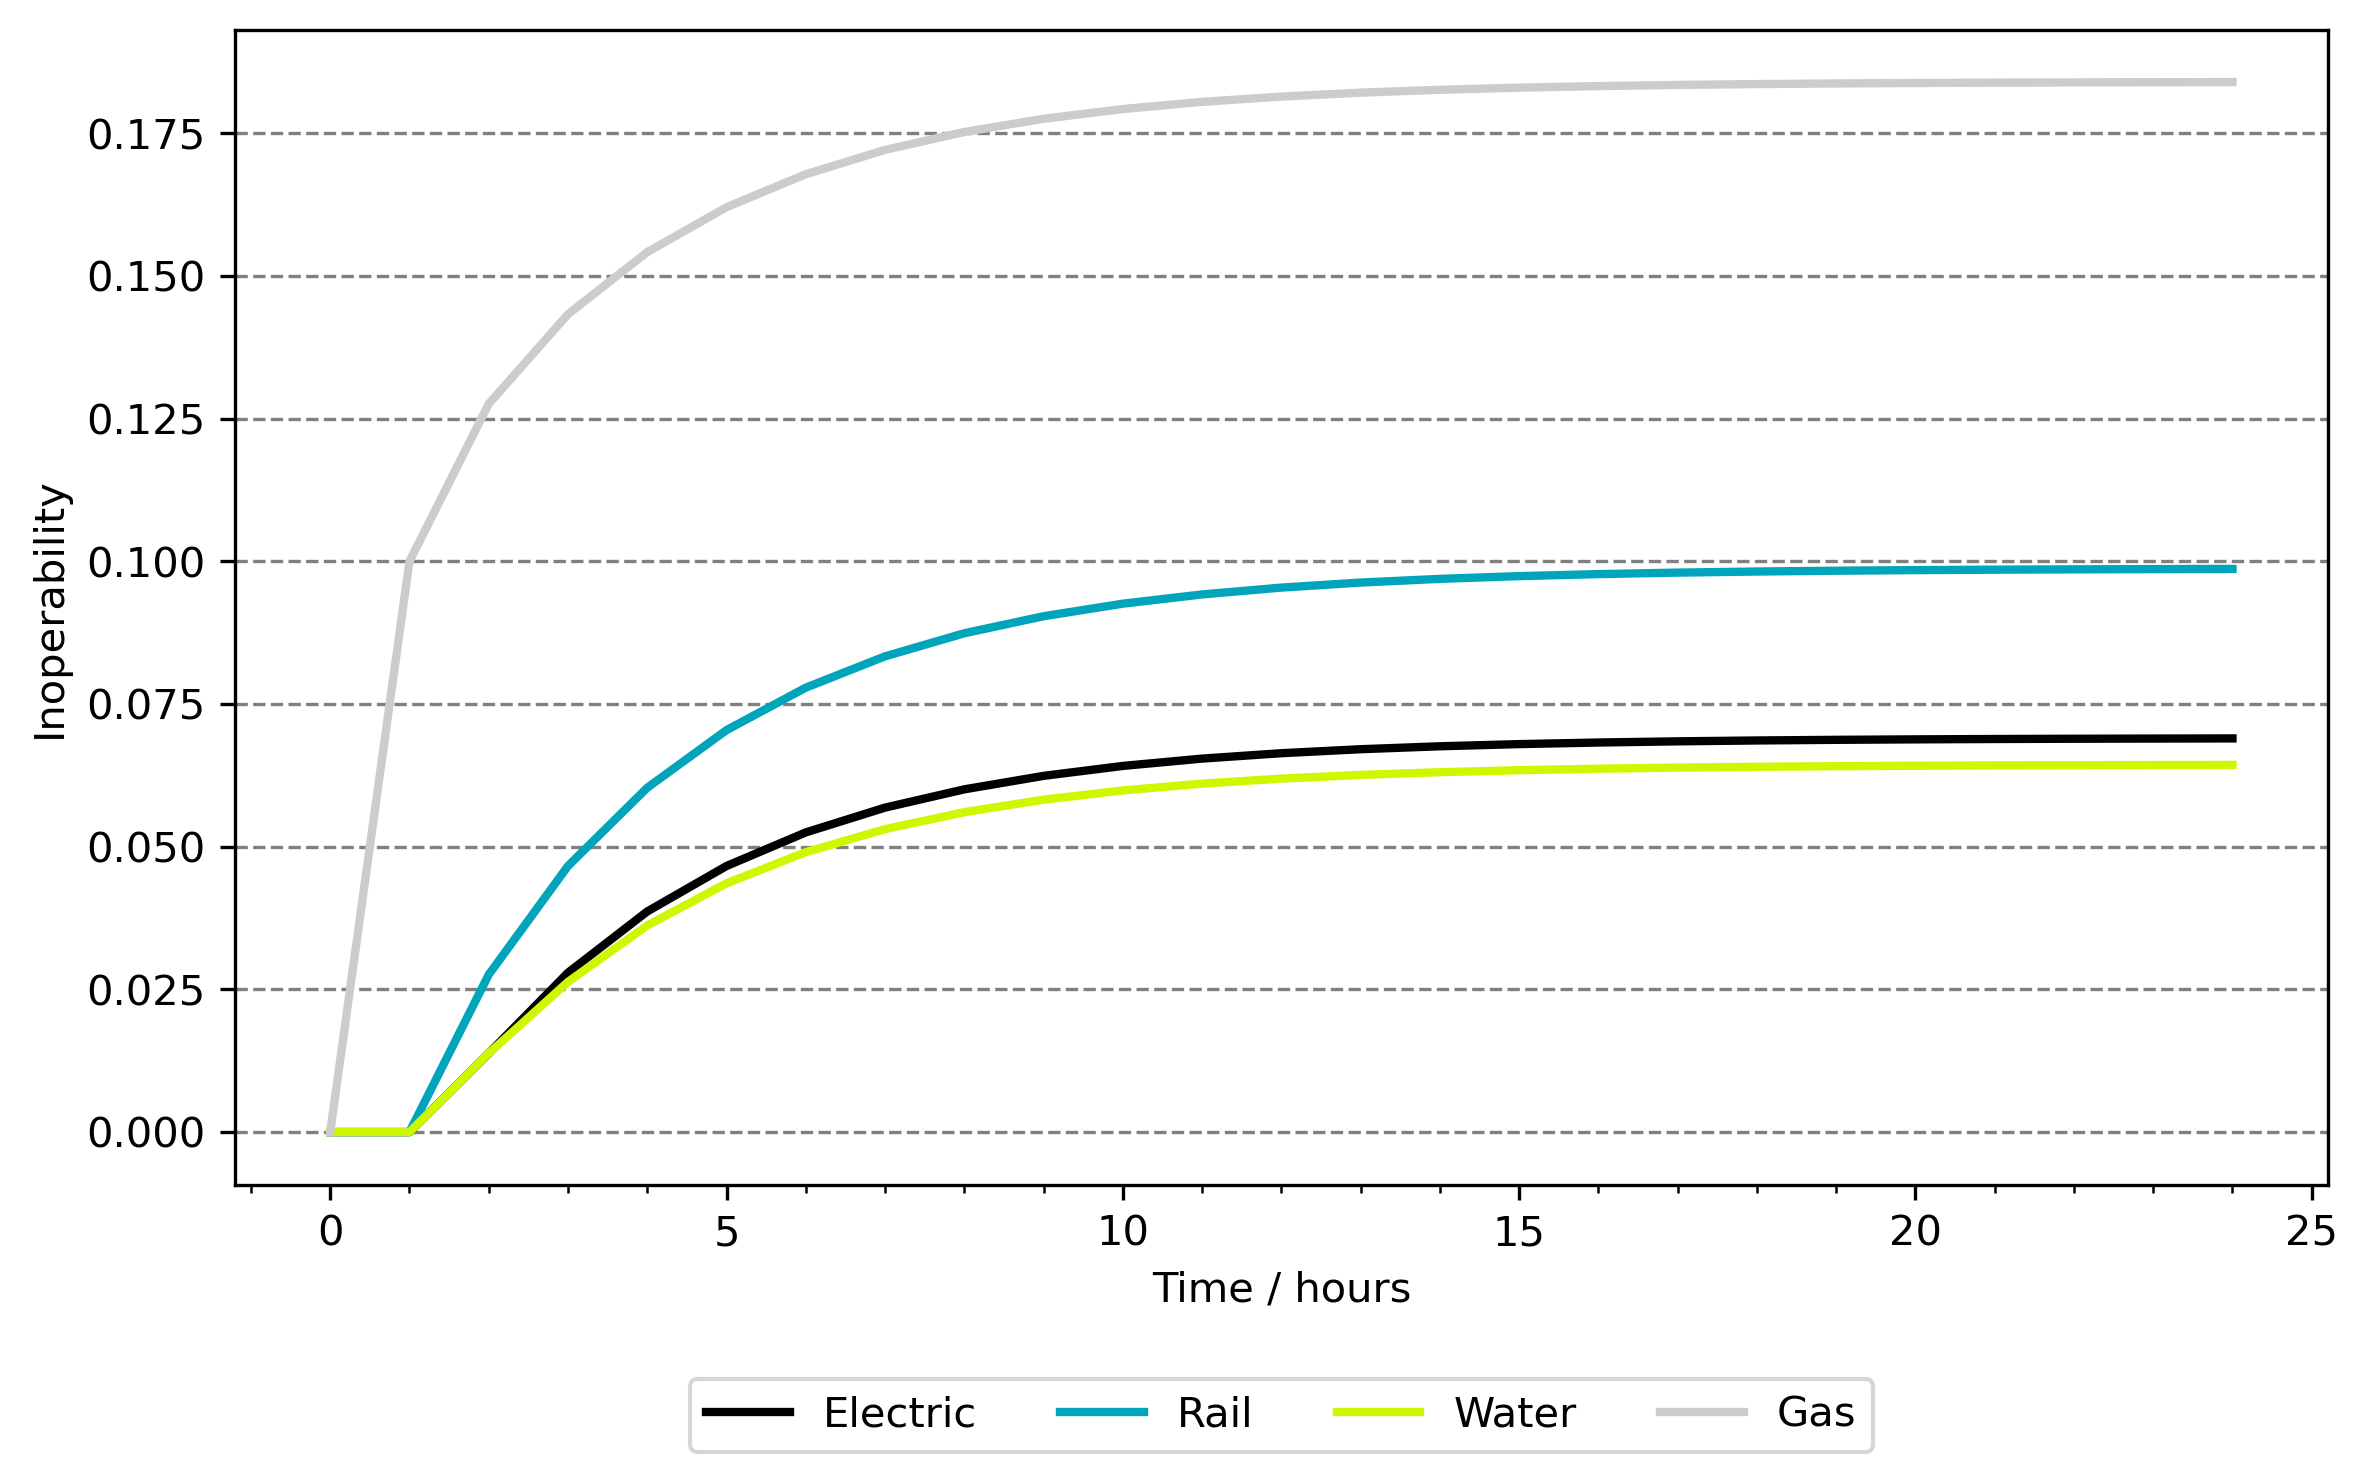

In [5]:
datafile = "example.xlsx"

pinfra = ["Electric", "Gas"]
ptime = [[0, 24]]
cvalue = [0.1]
time_steps = 25

for p in pinfra:
    model = diimpy.diim.DIIM(
        generate_config(
            datafile, pinfra=[p], cvalue=cvalue, ptime=ptime, time_steps=time_steps
        )
    )
    df, qtot = diimpy.analyze.analyze_dynamic_inoperability(
        model, sheet_name="Dynamic_inoperability_" + p
    )
    diimpy.plot.plot_dynamic(df)